In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/dataset.csv", index_col=0)
df

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [3]:
y = df['trestbps']
y

age
63    145
37    130
41    130
56    120
57    120
     ... 
57    140
45    110
68    144
57    130
57    130
Name: trestbps, Length: 303, dtype: int64

In [10]:
x = df.drop('trestbps' , axis=1)
x = x.drop('target' , axis=1)
x

,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,,,,,,,,,,,
63,1,3,233,1,0,150,0,2.3,0,0,1
37,1,2,250,0,1,187,0,3.5,0,0,2
41,0,1,204,0,0,172,0,1.4,2,0,2
56,1,1,236,0,1,178,0,0.8,2,0,2
57,0,0,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,241,0,1,123,1,0.2,1,0,3
45,1,3,264,0,1,132,0,1.2,1,0,3
68,1,0,193,1,1,141,0,3.4,1,2,3


# 원-핫 인코딩

In [5]:
Y = pd.get_dummies(y).values


In [7]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
X = x.values
X

array([[  1.,   3., 233., ...,   0.,   0.,   1.],
       [  1.,   2., 250., ...,   0.,   0.,   2.],
       [  0.,   1., 204., ...,   2.,   0.,   2.],
       ...,
       [  1.,   0., 193., ...,   1.,   2.,   3.],
       [  1.,   0., 131., ...,   1.,   1.,   3.],
       [  0.,   1., 236., ...,   1.,   1.,   2.]])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((242, 11), (242, 49), (61, 11), (61, 49))

In [14]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(11,input_shape=(11,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 30)                360       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,453
Trainable params: 1,453
Non-trainable params: 0
_________________________________________________________________


In [15]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10


2024-01-16 02:19:40.230811: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 0s 13ms/step - loss: 0.1492 - mse: 0.1492 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0650 - val_mse: 0.0650
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0269 - va

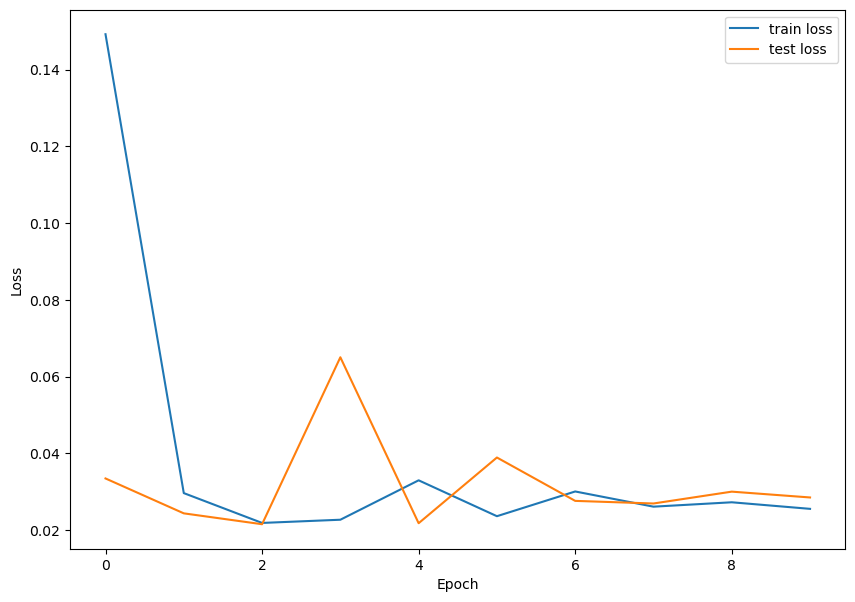

In [16]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.0285


[0.028479458764195442, 0.028479458764195442]